Contributing Jupyter Notebooks
Please include the version of the SDK and any other packages used to generate the Jupyter Notebook at the start of the notebook. This helps others to reproduce your results in the future.

In [1]:
from vortexasdk import Products, CargoTimeSeries, Geographies
from datetime import datetime
import pandas as pd
import matplotlib.pyplot as plt

# Products tutorial

First I’m going to show you how to get the Vortexa ID for a product you are interested in studying. There are many ways of doing this, and today I’m going to show you one option I have used.

From the examples in the docs found here: https://vortechsa.github.io/python-sdk/endpoints/products/. We can see an example line of code which shows us how to look in for different products in a list

In [2]:
df = Products().search(term=['diesel', 'fuel oil', 'grane']).to_df()

2020-07-14 08:48:20,377 vortexasdk.operations — INFO — Searching Products
2020-07-14 08:48:20,379 vortexasdk.client — INFO — Creating new VortexaClient
2020-07-14 08:48:20,656 vortexasdk.client — WARNING — You are using vortexasdk version 0.21.1, however version 0.23.0 is available.
You should consider upgrading via the 'pip install vortexasdk --upgrade' command.
2020-07-14 08:48:20,657 vortexasdk.client — INFO — Payload: {'term': ['diesel', 'fuel oil', 'grane'], 'allowTopLevelProducts': True}
2020-07-14 08:48:23,196 vortexasdk.client — INFO — 71 Results to retrieve. Sending 1 post requests in parallel using 6 threads.


In [3]:
df.head()

,id,name,layer.0,parent.0.name
0,1c107b4317bc2c85fb6c13cd7b28e8e0a02ec7fecc68af...,Fuel Oil,group_product,Dirty Petroleum Products
1,da9e67b1dd201a1ad3ae251e6dce8fad404ce50d53adba...,RMD Fuel Oil,grade,High Sulphur Fuel Oil
2,e6e879021c45470d84ee2f182a42a13537b489ae730640...,Other Fuel Oils,grade,High Sulphur Fuel Oil
3,06e1a5edb6519714720803884d565fd830854cffb7f0a1...,Fuel Oil Bunkers,grade,High Sulphur Fuel Oil
4,0dd7857f328177189e20a54af1dc599c8b7e04e79e61cd...,Fuel Oil Cut,grade,High Sulphur Fuel Oil


For my study I want to focus on crude/condensates so I am going to modify the list which contains oil product names like this: 

In [4]:
crude_search_df = Products().search(term=['crude']).to_df()

2020-07-14 08:48:24,921 vortexasdk.operations — INFO — Searching Products
2020-07-14 08:48:24,922 vortexasdk.client — INFO — Payload: {'term': ['crude'], 'allowTopLevelProducts': True}
2020-07-14 08:48:25,518 vortexasdk.client — INFO — 18 Results to retrieve. Sending 1 post requests in parallel using 6 threads.


In [5]:
crude_search_df

,id,name,layer.0,parent.0.name
0,6f11b0724c9a4e85ffa7f1445bc768f054af755a090118...,Crude,group_product,Crude/Condensates
1,e1b3d075a9340969322024a35b8c720e5065d8c95a91b6...,Crude Vegoil,grade,Biodiesel Feedstock
2,4fe046d7478c4072b9ecbaa2c03d3b977bbfec5077ee44...,Crude Butadiene,grade,Olefins/Other Chemicals
3,54af755a090118dcf9b0724c9a4e9f14745c26165385ff...,Crude/Condensates,group,NaN
4,9fda040ee8844e47b5239051e322d06dd9d2b96f0c3249...,TPAO crude,grade,Medium-Sour
5,2b76490350005604507ca64567101df7d3db80a973f462...,Crude Vegetable Oil,grade,Biodiesel Feedstock
6,f26cd12252b0bb23b4ab4ab590eaee11037d78a7ac5cc6...,Crude Benzene,grade,Chemicals
7,e9d1031a9167fff80ef089f2d5591deb1833ee34f1d028...,Crude Palm Oil,grade,Biodiesel Feedstock
8,c2aa8895d3d176868cbb0519f2bb5318a74a2a66ac9034...,Eagle Ford crude,grade,Light-Sweet
9,164a4a510343458bbf949a79964ce3bb8efa8d14276c48...,US Shale Crude,grade,Light-Sweet


Here we can see that there are 18 rows and we only want the id where the name column is equal to `Crude/Condensates	`. So we can query the DataFrame like this to get just row of the DataFrame we are interested in. 

In [13]:
crude_search_df.query("name=='Crude/Condensates'")

,id,name,layer.0,parent.0.name
3,54af755a090118dcf9b0724c9a4e9f14745c26165385ffa7f1445bc768f06f11,Crude/Condensates,group,NaN


If you look at the end of the id you can see it finishes with `...` this suggests that we cant see the full legnth of the column. If we increase the width options of the row like this `pd.set_option('max_colwidth', 75)` and run the same query of the dataframe we can see the full id. The rest of the notebook will have the column width settings we have defined here so we will not need to do it again. 

In [15]:
pd.set_option('max_colwidth', 75)
crude_search_df.query("name=='Crude/Condensates'")

,id,name,layer.0,parent.0.name
3,54af755a090118dcf9b0724c9a4e9f14745c26165385ffa7f1445bc768f06f11,Crude/Condensates,group,NaN


# Geographies 

Just like before we are going to use one of the examples from the documentation and slightly tweak it to what we need for our study. Docs found here: https://vortechsa.github.io/python-sdk/endpoints/geographies/.

In [16]:
df = Geographies().search(term=["Liverpool", "Southampton"]).to_df()

2020-07-14 08:55:11,229 vortexasdk.operations — INFO — Searching Geographies
2020-07-14 08:55:11,229 vortexasdk.client — INFO — Payload: {'term': ['Liverpool', 'Southampton']}
2020-07-14 08:55:16,342 vortexasdk.client — INFO — 4 Results to retrieve. Sending 1 post requests in parallel using 6 threads.


In [9]:
df

,id,name,layer
0,b600e4f54cbdef578b2c6bdd7f508212ee4fb9552991d82e180a3d8f625669fd,Liverpool [GB],[port]
1,0c69b0aaf2d110e102dd3b3f05d5540b8e5346d27f344a71983ab7d4566de0f2,Southampton [GB],[port]
2,8baf08eff90bf9a1677ca0e55aae7e139bfaf155563b1ee1e0824273e3181f2d,Liverpool Docks,[terminal]
3,98db74d66fac18f2b0d8488f46af96fec3fc6edb7bc267cf75a1c50b0d2ee2b1,Liverpool Bulk Liquids,[terminal]


In [10]:
china_search_df = Geographies().search(term=["China"]).to_df()

2020-07-14 08:51:17,244 vortexasdk.operations — INFO — Searching Geographies
2020-07-14 08:51:17,245 vortexasdk.client — INFO — Payload: {'term': ['China']}
2020-07-14 08:51:17,415 vortexasdk.client — INFO — 13 Results to retrieve. Sending 1 post requests in parallel using 6 threads.


In [11]:
china_search_df.head(5)

,id,name,layer
0,934c47f36c16a58d68ef5e007e62a23f5f036ee3f3d1f5f85a48c572b90ad8b2,China,[country]
1,781cacc7033f877caa4b4106d096b74afe006a96391bf5a56a4f55b849359a42,South China,[shipping_region]
2,a63890260e29d859390fd1a23c690181afd4bd152943a04c00cd6a5ecf3f7d1e,North China,[shipping_region]
3,b5fafce6e20de2dc307fb7e0b89978ee91a49a7b6ec6f5461daf2633f3c56674,China (excl. HK & Macau),[shipping_region]
4,9a021f43c397b175ddfff7a91d46ee6e6e16d37e9f9d52398ac6895656109d86,China Steel Chemical,[terminal]


In [12]:
china_search_df.query("name=='China'")

,id,name,layer
0,934c47f36c16a58d68ef5e007e62a23f5f036ee3f3d1f5f85a48c572b90ad8b2,China,[country]


# Chinese floating storage study

For my study I want to look at Crude and condensates in currently in floating storage sitated in China and how this has changed over in 2020. So once again Im going to take the code which is provided in the documentation and change it to my specific needs.

Lets break down the query bellow line by line.

Together lets break this down line by line to understand whats going on. 

1) The first line finds the ID for Rotterdam using the geographies endpoint and assigns it to a variable called `rotterdam`

2) Then the ID for crude using the products endpoint and assigns it to a variable called `crude`

3) Then it calls the CargoTimeSeries endpoint

4) The `timeseries_unit` arguement is set to `bpd` which means the unit is set to barrels

5) The `timeseries_frequency` arguement is set to `month` which means the time scale is set the months

6) The `filter_origins` arguement is set to `rotterdam` the variable defined in the 1st line

7) The `filter_products` arguement is set to `crude` which was defined in the 2nd line

8) The `filter_activity` argument is set to `loading_state`. 

9) The `filter_time_min`, the start time for the query is set to the beginning of 2018

10) The `filter_time_max`, the end time for the query is set to the end of 2018

11) The search result is turned into a DataFrame


In [17]:
rotterdam = [g.id for g in Geographies().search("rotterdam").to_list() if "port" in g.layer]
crude = [p.id for p in Products().search("crude").to_list() if "Crude" == p.name]
search_result = CargoTimeSeries().search(
    timeseries_unit='bpd',
    timeseries_frequency='month',
    filter_origins=rotterdam,
    filter_products=crude,
    filter_activity='loading_state',
    filter_time_min=datetime(2018, 1, 1),
    filter_time_max=datetime(2018, 12, 31))
df = search_result.to_df()

2020-07-14 08:56:23,260 vortexasdk.operations — INFO — Searching Geographies
2020-07-14 08:56:23,261 vortexasdk.client — INFO — Payload: {'term': ['rotterdam']}
2020-07-14 08:56:26,383 vortexasdk.client — INFO — 11 Results to retrieve. Sending 1 post requests in parallel using 6 threads.
2020-07-14 08:56:27,834 vortexasdk.operations — INFO — Searching Products
2020-07-14 08:56:27,835 vortexasdk.client — INFO — Payload: {'term': ['crude'], 'allowTopLevelProducts': True}
2020-07-14 08:56:29,146 vortexasdk.client — INFO — 18 Results to retrieve. Sending 1 post requests in parallel using 6 threads.
2020-07-14 08:56:30,594 vortexasdk.operations — INFO — Searching CargoTimeSeries
2020-07-14 08:56:30,596 vortexasdk.client — INFO — Payload: {'filter_activity': 'loading_state', 'filter_time_min': '2018-01-01T00:00:00.000Z', 'filter_time_max': '2018-12-31T00:00:00.000Z', 'filter_products': ['6f11b0724c9a4e85ffa7f1445bc768f054af755a090118dcf99f14745c261653'], 'filter_origins': ['68faf65af1345067f

So how can we change that query to get Crude/condestates in floating storage sitatued in China? 
As we already have the IDs for our geography and product we dont need to call those endpoints in our first 2 lines.

1) We can assign the ID for China to a variable called `china_id` using the ID we found earlier in the notebook

2) Assign the ID for the Crude/Condensates to a variable called `crude_condesates_id`

3) We keep this the same as before as we are calling the same endpoint.

4) For our 4th line, I prefer to think of things in terms of tonnes so I’m going to change the timeseries_unit to be `t`.

5) For the 5th line, I’m going to change `month` to `day` as I'd like to see the change on a daily basis

6) Here I’m going to change this one slightly, as I’m not concerned where the crude/ condensates have come from I’m going to remove the `filter_origins` argument and replace it which `filter_storage_locations`, and set it to `china_id` which we have defined in the first line.

7) Set the `filter_products` argument to `crude_condesates_id` which we have defined in the 2nd line.

8) This time for the 8th line I’m going to set the `filter_activity` to `'storing_state'`.

9) Here I have changed the date to be at the start of this year

10) Using `datetime.today().date()` we get today’s date

11) Finally, I’m going to keep the 11th line the same. As I would like the results to be a DataFrame just like in the first query


Lets see what happens

In [23]:
china_id = '934c47f36c16a58d68ef5e007e62a23f5f036ee3f3d1f5f85a48c572b90ad8b2'
crude_condesates_id = '54af755a090118dcf9b0724c9a4e9f14745c26165385ffa7f1445bc768f06f11'
search_result = CargoTimeSeries().search(
    timeseries_unit='t',
    timeseries_frequency='day',
    filter_storage_locations=china_id,
    filter_products=crude_condesates_id,
    filter_activity='storing_state',
    filter_time_min=datetime(2020, 1, 1),
    filter_time_max=datetime.today().date())
df_fs = search_result.to_df()

2020-07-14 09:55:29,495 vortexasdk.operations — INFO — Searching CargoTimeSeries
2020-07-14 09:55:29,496 vortexasdk.client — INFO — Payload: {'filter_activity': 'storing_state', 'filter_time_min': '2020-01-01T00:00:00.000Z', 'filter_time_max': '2020-07-14T00:00:00.000Z', 'filter_products': ['54af755a090118dcf9b0724c9a4e9f14745c26165385ffa7f1445bc768f06f11'], 'filter_storage_locations': ['934c47f36c16a58d68ef5e007e62a23f5f036ee3f3d1f5f85a48c572b90ad8b2'], 'timeseries_frequency': 'day', 'timeseries_unit': 't', 'timeseries_activity': 'storing_state', 'size': 500}


In [19]:
df_fs

,key,value,count
0,2020-01-01T00:00:00.000Z,1696002,25
1,2020-01-02T00:00:00.000Z,1390004,20
2,2020-01-03T00:00:00.000Z,1206009,20
3,2020-01-04T00:00:00.000Z,1687160,22
4,2020-01-05T00:00:00.000Z,2076389,22
...,...,...,...
191,2020-07-10T00:00:00.000Z,10605473,87
192,2020-07-11T00:00:00.000Z,10907096,84
193,2020-07-12T00:00:00.000Z,10962023,83
194,2020-07-13T00:00:00.000Z,11099311,82


# Displaying this data in a graph

So here Im to show you how to display the graph in a notebook but first I'm going to show you how to export the data as a CSV so you can look at the data in Excel or Google Sheets.

To export the DataFrame to your desktop as a CSV add `.to_csv('~/Desktop/chinese_floating_storage.csv')` to the DataFrame in a cell.

Like this: 

In [20]:
df_fs.to_csv('~/Desktop/chinese_floating_storage.csv')

Now if you look on your desktop there should be a file called `chinese_floating_storage.csv`, and you'll be able to open this file in excel. 

Using a python library called matplotlib that we imported at the top of this notebook you can also display the results of the query like this: 

In [21]:
# rename columns
df_fs = df_fs.rename(columns={'key': 'date',
                              'value': 't',
                              'count': 'number_of_cargo_movements'})

# remove time zone from timestamp
df_fs['date'] = pd.to_datetime(df_fs['date']).dt.tz_localize(None)

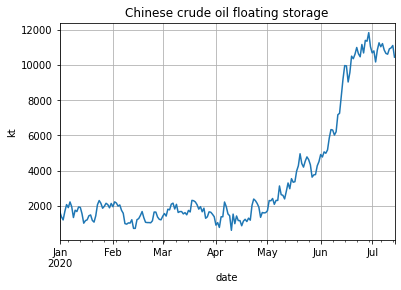

In [22]:
floating_storage = df_fs.set_index('date')['t'] / 1000
floating_storage.plot(title='Chinese crude oil floating storage', grid=True)
plt.xlabel('date')
plt.ylabel('kt');